# Exercise: Credit Cards
### Laura Adam

#### Download this dataset from Kaggle (https://www.kaggle.com/arjunbhasin2013/ccdata ) and use the K-Means Clustering algorithm to explore patterns in the dataset. Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) and feel free to try out different numbers of clusters. Try to discover what makes each cluster distinct from another (clusters of low balance vs high balance? Are there groups of certain credit limits?, etc.). Use visualization if needed to identify trends in this data



### K-Means Clustering

#### K-means is an **unsupervised learning** algorithm that learns the features of a dataset and tries to "figure out" the groups (categories, which are the "k" value) based on similarities. These groups are classified by their distance to a **centroid**, which is the mean of a cluster group. K-means can help identify segments of data points that have similar features, even though they may not belong to the same target category. Unsupervised learning is less about trying to predict the correct categories, moreso than it is about finding trends of data points that seem to be similar. 

[Supervised vs Unsupervised learning](https://notebooks.azure.com/priesterkc/projects/testdb/raw/kmeans_cluster.png)

Source: [Towards Data Science: Unsupervised Learning with Python](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03)

In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#use dataset with
location = "datasets/CC General.csv"
df = pd.read_csv(location)

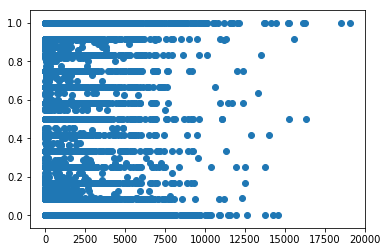

In [3]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
plt.scatter(df['BALANCE'],df['PURCHASES_FREQUENCY'])

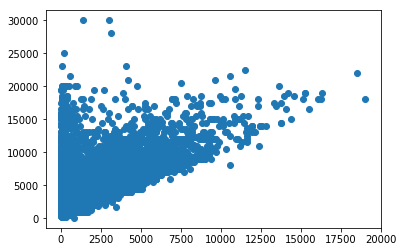

In [4]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
plt.scatter(df['BALANCE'],df['CREDIT_LIMIT'])

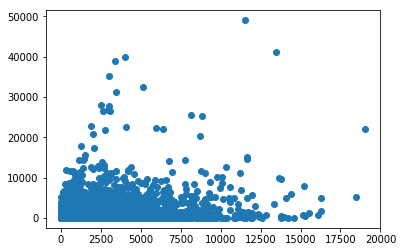

In [5]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
plt.scatter(df['BALANCE'],df['PURCHASES'])

In [6]:
#items that are in the CC data
df.keys()

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
df.shape

(8950, 18)

In [8]:
df.size


161100

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [11]:
#Drop the rows where at least one element is missing. Rename DF
dropdf = df.dropna()

In [12]:
# describe new DF.  Check that counts are all the same
dropdf.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [25]:
from pandas import DataFrame


export_csv = dropdf.to_csv (r'C:\Users\GBTC408008ur\Documents\Immersive\datasets\CC_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path



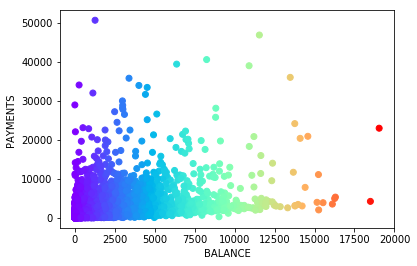

In [14]:
#plot CC data by CREDIT_LIMIT vs PAYMENTS

plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS ')
#plt.scatter(dropdf['BALANCE'], dropdf['PURCHASES'], c=dropdf['CASH_ADVANCE'], cmap='rainbow')
plt.scatter(dropdf['BALANCE'],dropdf['PAYMENTS'],c=dropdf['BALANCE'],cmap='rainbow')

#### Let's see if the k-means algorithm can figure out that the clusters relate to iris flower species

First, we'll try it with the entire dataset. Then later we'll add a new data point (flower) and see which species (target) it will classify it as.

In [15]:
#dataframe containing only predictive features
#i.e. complete data.  Count should = 8950
X = dropdf.drop(['CUST_ID'], axis=1)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [16]:
y = dropdf['BALANCE'].copy()
y.head()

0      40.900749
1    3202.467416
2    2495.148862
4     817.714335
5    1809.828751
Name: BALANCE, dtype: float64

In [21]:
#initialize the k-means algorithm
#setting it to find 3 clusters (category groups)
kmeans = KMeans(n_clusters=3)

In [22]:
#teach the model where the data points are
#calculates centroids
#classifes data points to a cluster depending on closest centroid
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
#data point coordinates for centroids of each cluster
#each line is a (cluster)

print(kmeans.cluster_centers_)

[[3.47948597e+03 9.47071356e-01 1.60091685e+03 9.99040282e+02
  6.02202298e+02 2.16697153e+03 5.41183799e-01 3.18153637e-01
  3.87088056e-01 2.16111348e-01 5.89399454e+00 2.22802548e+01
  9.06258169e+03 2.97605810e+03 1.60690247e+03 1.32953414e-01
  1.17356688e+01]
 [4.83073379e+03 9.16967664e-01 1.09117699e+04 7.69262336e+03
  3.21931844e+03 5.17149377e+03 7.59576219e-01 6.04345945e-01
  6.13561977e-01 2.25522508e-01 9.25000000e+00 8.74765625e+01
  1.24886719e+04 1.80863983e+04 2.49055499e+03 3.39700266e-01
  1.18359375e+01]
 [8.81447559e+02 8.76464108e-01 6.24425539e+02 3.23832407e+02
  3.00901956e+02 5.00910489e+02 4.74914145e-01 1.58727403e-01
  3.57492397e-01 1.08473896e-01 2.29477021e+00 1.10393027e+01
  2.77887062e+03 1.03871921e+03 5.72642601e+02 1.64822958e-01
  1.14581616e+01]]


Text(0, 0.5, 'BALANCE')

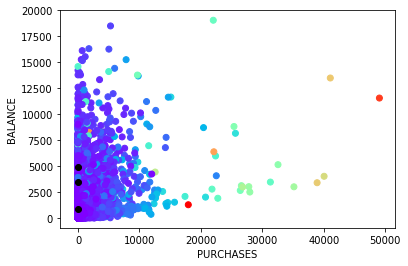

In [23]:
#scatterplot  with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(X['PURCHASES'], X['BALANCE'], c=X['PAYMENTS'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')

In [27]:
#new data point

point = ['1014.926473', '1', '861.49', '661.49', '200', '0', '0.333333', '0.083333', '0.25', '0', '0','5', '7000', '688.278568', '311.963409', '0', '12']

#predict category of new data point

print(kmeans.predict([point]))

[1]


In [ ]:
#see plot of new data point

#k-means predicted clusters (in color) for the data points
plt.scatter(irisdf['petal width (cm)'], irisdf['petal length (cm)'], c=irisdf['clusters'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(point[3],point[2],c='black')

plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')



Text(0, 0.5, 'BALANCE')

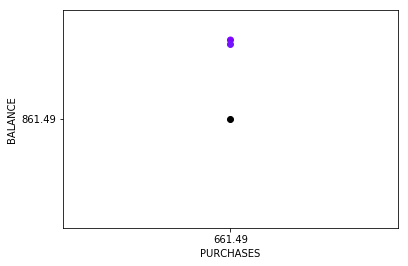

In [28]:
#see plot of new data point

#clusters of original features based on original category
plt.scatter(X['PURCHASES'], X['BALANCE'], c=X['PAYMENTS'], cmap='rainbow')

#new data point is the black dot
plt.scatter(point[3],point[2],c='black')

plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')